# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks 

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective. 


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [2]:
# url string that hosts our .csv file
path = "cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(path)


# Exploring the content of the data set

Get a general 'feel' of the data


In [3]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [4]:
# Number of times that each distinct value of a variable occurs in a data set
df.Complete.value_counts()


Y    22
N     6
Name: Complete, dtype: int64

In [5]:
# Proportion of each distinct value of a variable occurs in a data set
x = df.Complete.value_counts()

ratio = 100 * x / x.sum()
ratio


Y    78.571429
N    21.428571
Name: Complete, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [6]:
# Total number of observations
nObs, nVar = df.shape
print(nObs)


# Total number of null observations
nObsNull = df.Complete.isnull().sum()
print(nObsNull)

# Total number of counts (excluding missing values)
nObsNoNull = df.Complete.notnull().sum()
print(nObsNoNull)



28
0
28


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

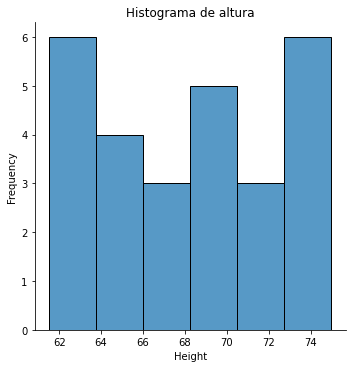

In [7]:
# Plot histogram of the height only
hist = sns.displot(df["Height"])
hist.set(ylabel = "Frequency", title = "Histograma de altura")
plt.show()

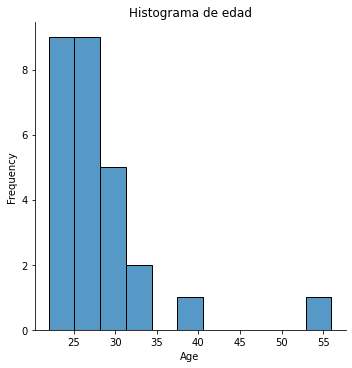

In [8]:
# Plot distribution of the tips only
x = sns.displot(df["Age"])
x.set(title = "Histograma de edad", ylabel = "Frequency")
plt.show()


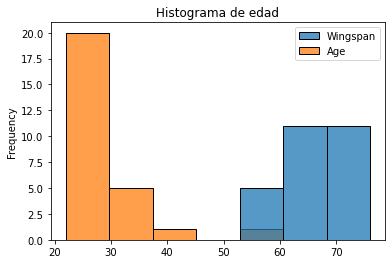

In [9]:
# Plot histogram of both the Age and the Wingspan
hist = sns.histplot([df["Wingspan"], df["Age"]])
hist.set(ylabel = "Frequency", title = "Histograma de edad")

plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

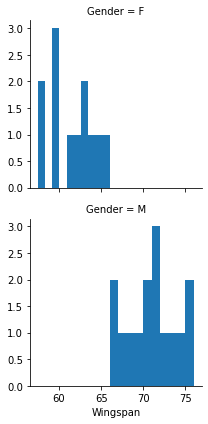

In [10]:
# Create histograms of the "Wingspan" grouped by "Gender"
g = sns.FacetGrid(df, row = "Gender")
g = g.map(plt.hist, 'Wingspan')
plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

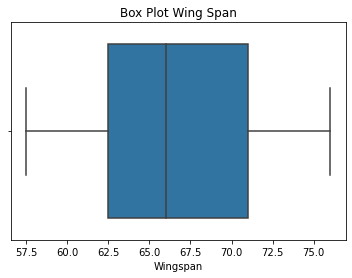

In [11]:
# Create the boxplot of the "total bill" amounts
box = sns.boxplot(x = df["Wingspan"])
box.set(title = "Box Plot Wing Span")
plt.show()


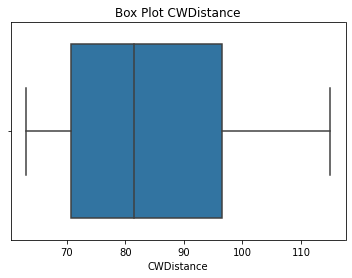

In [12]:
# Create the boxplot of the "tips" amounts
box = sns.boxplot(x = df["CWDistance"])
box.set(title = "Box Plot CWDistance")
plt.show()


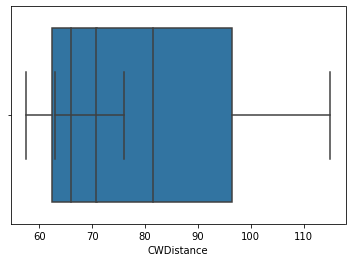

In [13]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts
sns.boxplot(x = df["Wingspan"])
sns.boxplot(x = df["CWDistance"])
plt.show()

#Do not use this king of plot

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

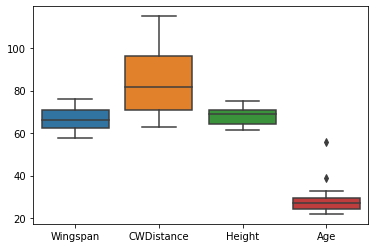

In [14]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"
boxData = df.loc[:,["Wingspan", "CWDistance", "Height", "Age"]]
sns.boxplot(data = boxData, orient = "v")

plt.show()


# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


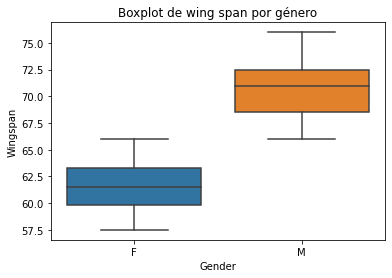

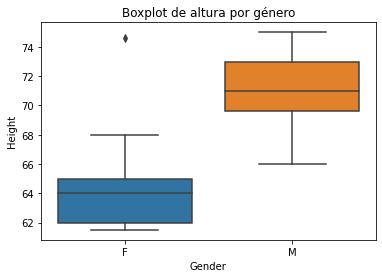

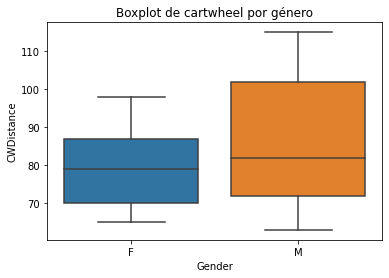

In [15]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
sns.boxplot(y = df["Wingspan"], x = df["Gender"]).set(title = "Boxplot de wing span por género")
plt.show()

sns.boxplot(y = df["Height"], x = df["Gender"]).set(title = "Boxplot de altura por género")
plt.show()

sns.boxplot(y = df["CWDistance"], x = df["Gender"]).set(title = "Boxplot de cartwheel por género")
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

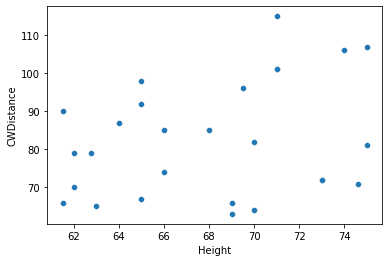

In [16]:
# scatter plot between two variables
sns.scatterplot(data = df, y = "CWDistance", x = "Height")
plt.show()

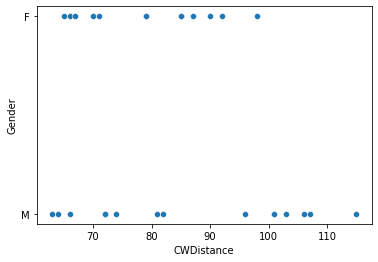

In [17]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data = df, x = "CWDistance", y = "Gender")
plt.show()

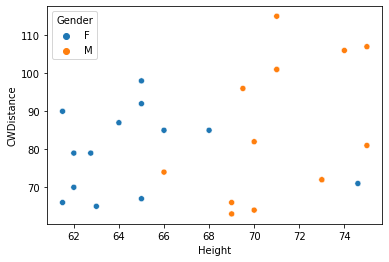

In [18]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data = df, x = "Height", y = "CWDistance", hue = "Gender")
plt.show()

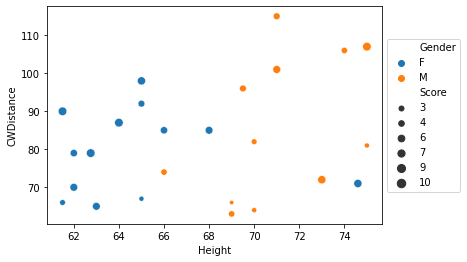

In [19]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data = df, x = "Height", y = "CWDistance", hue = "Gender", size = "Score").legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective
